<span style="color:#D40076; background-color:#FFDDDC; font-weight:bold;font-size:30px">
# Price Analysis for used Honda Car Selling
</span>


__Introduction:__ Collected dataset from Kaggle https://www.kaggle.com/code/keremkarayaz/honda-car-selling-analysis.This dataset gives information about  car year,    how long the car driven, fuel type, suspension,  model & price. Analysing I can have an idea what will be the used car price based on certain  conditions.

In [1]:
#Importing necessary  libraries

import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading dataset

my_data=pd.read_csv(r"honda_car_selling.csv")
my_data.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [3]:
#Cleaning data & convert in suitable format to visualize 

my_data["Price"]=my_data["Price"].str.replace(" Lakh", "")
my_data["kms Driven"]=my_data["kms Driven"].str.replace(" kms", "")
my_data["Car Model"] = my_data["Car Model"].str.replace(" ", "_")
my_data.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006,Petrol,Automatic,9.29,Honda_City_V_CVT
1,2021,11936,Petrol,Automatic,13.95,Honda_City_ZX_CVT
2,2018,29635,Petrol,Automatic,9.95,Honda_City_i-VTEC_CVT_ZX
3,2020,16163,Petrol,Automatic,13.26,Honda_City_ZX_CVT
4,2015,105114,Petrol,Manual,5.68,Honda_City_i_VTEC_V


In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [9]:
my_data.describe()

,Year
count,999.000000
mean,2014.717718
std,3.713756
min,2000.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2023.000000


In [13]:
my_data.describe(include=object)

,kms Driven,Fuel Type,Suspension,Price,Car Model
count,999,999,999,999,999
unique,693,3,2,332,183
top,70000,Petrol,Manual,3,Honda_City_1.5_S_MT
freq,24,797,776,32,47


__Create Bar Plot to see ratio between price & kms driven__

In [27]:
def bar_plot(data):
    plt.figure(figsize=(7,6),dpi=144)
    # Ensure the 'Price' column is numeric, with errors handled by converting non-numeric values to NaN
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    
    # Drop any rows with NaN values in 'Price' column after conversion
    data = data.dropna(subset=['Price'])

    # Get unique values from the 'kms Driven' column
    labels = data['kms Driven'][:20].unique()
    
    prices = []
    for label in labels:
        # Filter based on 'kms Driven' and calculate mean price
        price = data.loc[data['kms Driven'] == label, 'Price'].mean()
        prices.append(price)

    # Plot the bar chart
    colors=plt.cm.viridis(np.linspace(0, 1, len(labels)))
    bars = plt.bar(labels, prices, color=colors)
    
    # Add mean price value at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=5)
    
    # Plot the bar chart
    colors=plt.cm.viridis(np.linspace(0, 1, len(labels)))
    plt.bar(labels, prices, color=colors)
    plt.xlabel('kms Driven',fontsize=12)
    plt.ylabel('Mean Price',fontsize=12)
    plt.title('Mean Price based on kms Driven',fontsize=12)
    plt.xticks(rotation=30,fontsize=7)
    plt.show()

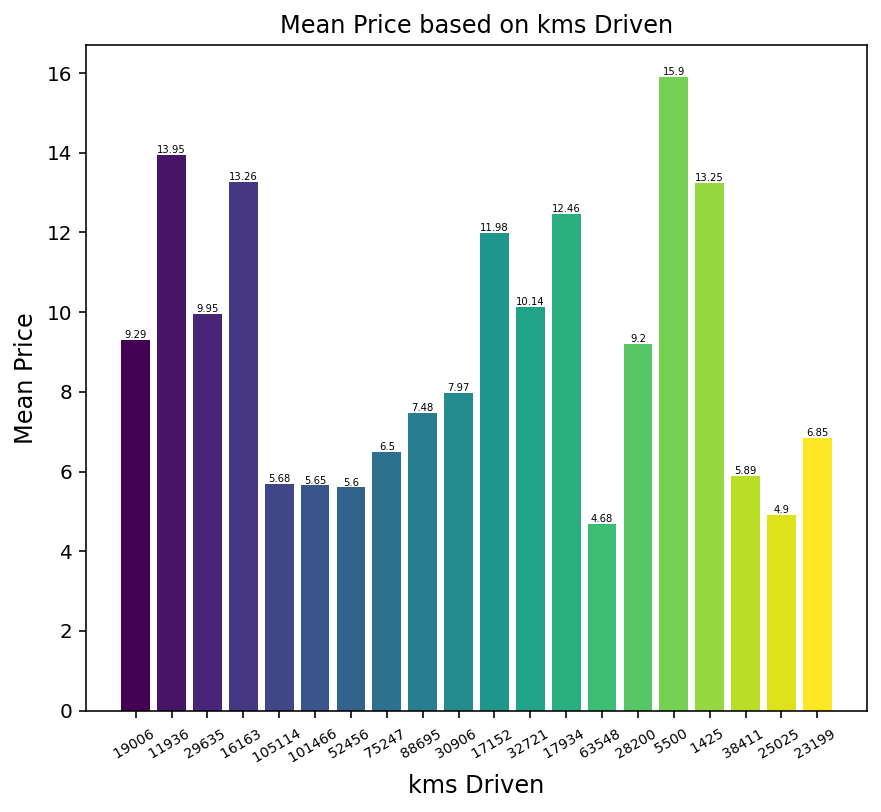

In [29]:
bar_plot(my_data)

In [258]:
def bar1_plot(data):
    plt.figure(figsize=(7,6),dpi=144)
    # Ensure the 'Price' column is numeric, with errors handled by converting non-numeric values to NaN
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    
    # Drop any rows with NaN values in 'Price' column after conversion
    data = data.dropna(subset=['Price'])

    # Get unique values from the 'kms Driven' column
    labels = data['Car Model'][:20].unique()
    
    prices = []
    for label in labels:
        # Filter based on 'kms Driven' and calculate mean price
        price = data.loc[data['Car Model'] == label, 'Price'].mean()
        prices.append(price)
    
    # Plot the bar chart
    colors=plt.cm.viridis(np.linspace(0, 1, len(labels)))
    bars = plt.bar(labels, prices, color=colors)
    
    # Add mean price value at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
    plt.xlabel('Car Model',fontsize=10)
    plt.ylabel('Mean Price')
    plt.title('Mean Price based on Car Model')
    plt.xticks(rotation=90)
    plt.show()

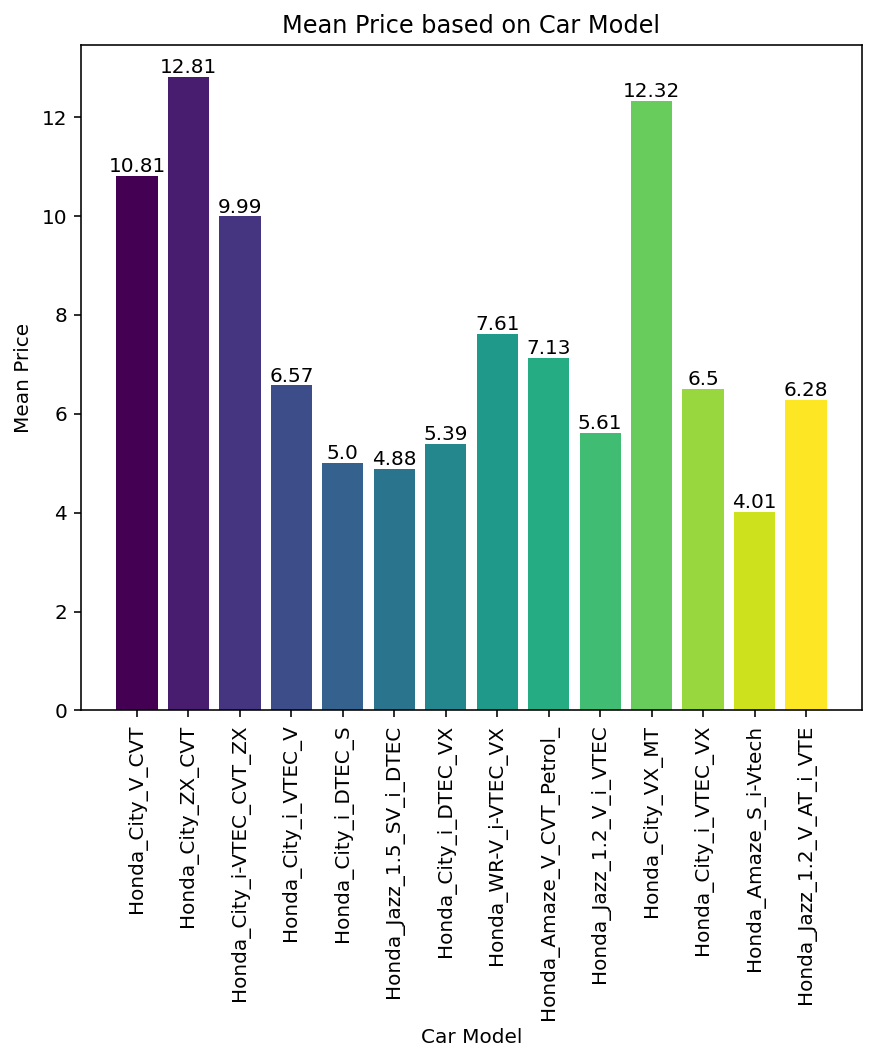

In [260]:
bar1_plot(my_data)

In [62]:
def bar2_plot(data):
    plt.figure(figsize=(7,6),dpi=144)
    # Ensure the 'Price' column is numeric, with errors handled by converting non-numeric values to NaN
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    
    # Drop any rows with NaN values in 'Price' column after conversion
    data = data.dropna(subset=['Price'])

    # Get unique values from the 'kms Driven' column
    labels = data['Year'][:20].unique()
    
    prices = []
    for label in labels:
        # Filter based on 'kms Driven' and calculate mean price
        price = data.loc[data['Year'] == label, 'Price'].mean()
        prices.append(price)
    
    # Plot the bar chart
    colors=plt.cm.viridis(np.linspace(0, 1, len(labels)))
    bars = plt.bar(labels, prices, color=colors)
    
    # Add mean price value at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
    plt.xlabel('Year',fontsize=10)
    plt.ylabel('Mean Price')
    plt.title('Mean Price based on Year')
    plt.xticks(rotation=90,ticks=labels, labels=labels)
    plt.show()

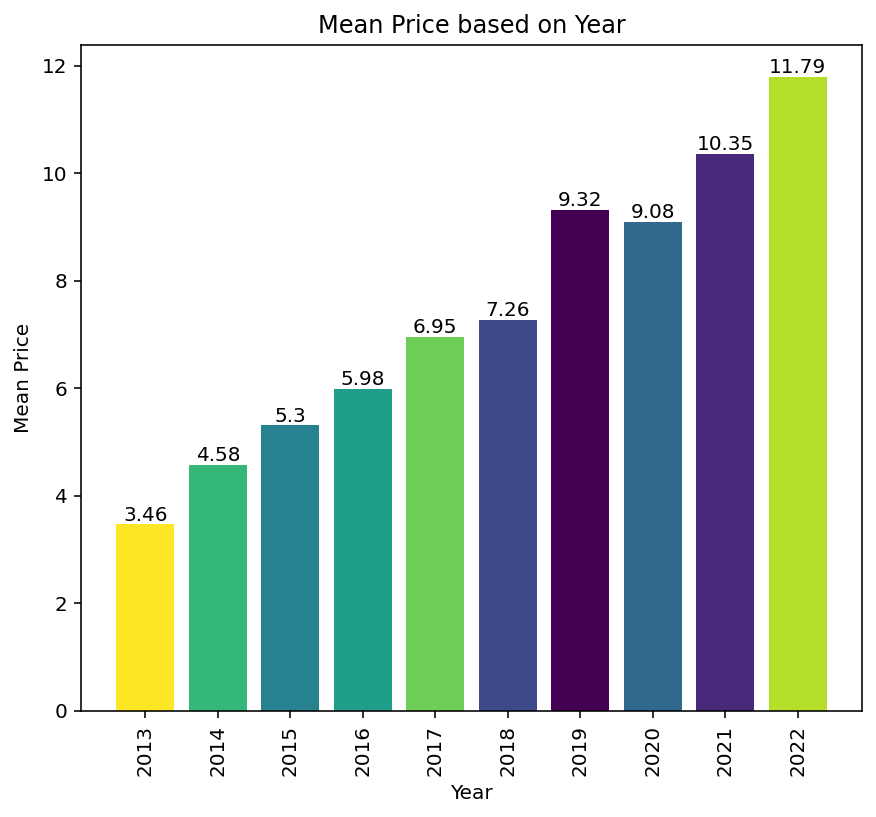

In [64]:
bar2_plot(my_data)

__Insights:__

From above bar plot with years on the x-axis and price on the y-axis, based on above bar chart I can get below insights:
Prices increased steadily from 2013 to 2022, indicating potential inflation or rising demand.However, it is maximum in 2019. Afterthat it is dropped at 2020 & then increase again.This drop indicate reduction of  demand. It is for Covid -19 impact.

__Create Histogram to count of cars based on different categorical variable__

In [39]:
def Histogram(x_value,x_label):
    
    """
    Create histogram putting categorical value on the y-axis 
    & counts on the x-axis
    """
    
    plt.figure(figsize=(5,4),dpi=144)
    n, bins, patches = plt.hist(x_value, color='black')

    # Giving label & title to make it easier for the reader
    plt.xlabel(f"{x_label}",fontsize=12) #  Used formatted string to dynamically insert the x_label value
    plt.ylabel("Count",fontsize=12)
    plt.title(f'Number of cars based on {x_label}',fontsize=12)
    plt.grid(c='lightgrey',linestyle='--', linewidth=1,alpha=0.3) 

    # Add the count value on top of each bar
    for i in range(len(patches)):
        height = patches[i].get_height()
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, 
                 str(int(height)), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()
    return

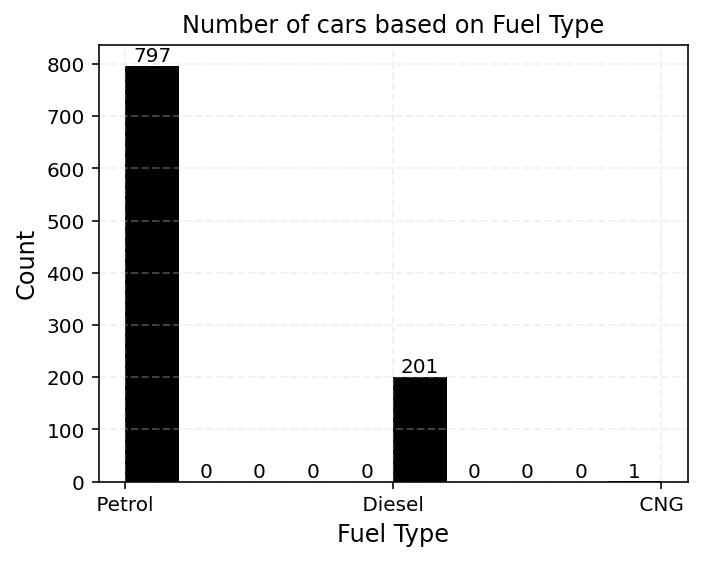

In [41]:
Histogram(my_data["Fuel Type"],"Fuel Type")

__Insights:__

From above bar graph, it is showing how many cars are using Petrol & diesel as fuel type. Analysing this graph, I can say 800 cars are using Petrol while only 200 cars are using diesel. However, No cars is using CNG.

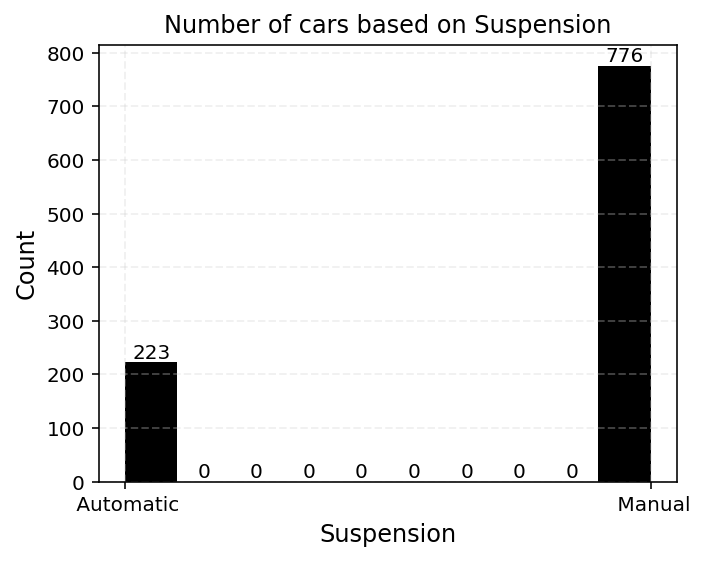

In [43]:
Histogram(my_data["Suspension"],"Suspension")

__Insights__

From above bar graph, it is showing how many cars are Automatic & Manual. Analysing this graph, I can say 223 cars are Automatic while 776 cars are manual.

__Create Pie Plot to see proportion of cars based on model__

In [45]:
def pie_plot(data):
    """
    Create pie plot to see different car model distribution
    """
    plt.figure(figsize=(8, 8))
    plt.pie(data,labels=data.index, autopct='%1.1f%%', colors=plt.get_cmap('Accent').colors, startangle=140,explode=(0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
    plt.title('Distribution of car model',fontsize=10)
    plt.tight_layout()
    return

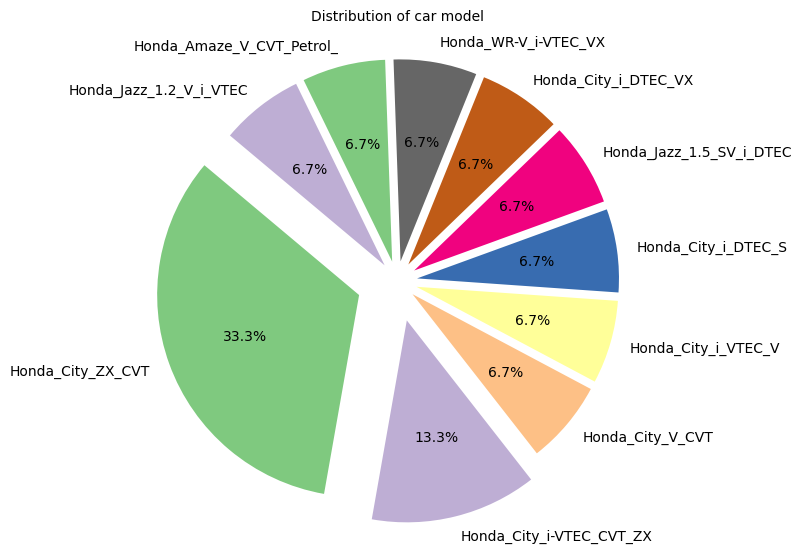

In [47]:
pie_plot(my_data['Car Model'][:15].value_counts())

In [57]:
my_data['Car Model'][:15].unique()

array(['Honda_City_V_CVT', 'Honda_City_ZX_CVT',
       'Honda_City_i-VTEC_CVT_ZX', 'Honda_City_i_VTEC_V',
       'Honda_City_i_DTEC_S', 'Honda_Jazz_1.5_SV_i_DTEC',
       'Honda_City_i_DTEC_VX', 'Honda_WR-V_i-VTEC_VX',
       'Honda_Amaze_V_CVT_Petrol_', 'Honda_Jazz_1.2_V_i_VTEC'],
      dtype=object)

__Insights__

Pie plot describe proportion of car brands used. Based on above pie plot, I can say as below:

Top Brands: Brand Honda_City_ZX_CVT has the largest market share at 33.3%, indicating it is the most popular among the ten brands."

Comparison: Brands Honda_City_ZX_CVT and Honda_City_i-VTEC_CVT_ZX follow at 33.3% and 13.3%, respectively, while the other brands account for smaller shares below 6.7%."

Distribution Patterns: All other brands have nearly equal shares, each around 6.7%, showing similar popularity."
